# 2. Manipulating and plotting data in Python: `numpy`, and `matplotlib` libraries With ANSWERS



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>


While Python has a rich set of modules and data types by default, for numerical computing you'll be using two main libraries that conform the backbone of the [Python scientific stack](https://scipy.org/about.html). These libraries implement a great deal of functionality related to mathematical operations and efficient computations on large data volumes. These libraries are [`numpy`](http://numpy.org) and [`scipy`](http://scipy.org). `numpy`, which we will concentrate on in this section, deals with efficient arrays, similar to lists, that simplify many common processing operations. Of course, just doing calculations isn't much fun if you can't plot some results. To do this, we use the [`matplotlib`](http://matplotlib.org) library.

But first, we'll see the concept of *functions*....


## 2.1 Functions

A function is a collection of Python statements that do something (usually on some data). For example, you may want to convert from Fahrenheit to Centigrade. The conversion is 

$$
^{\circ}C = \left(^{\circ}F -32\right)\cdot\frac{5}{9}
$$

A Python function will have a name (and we hope that the name is self-explanatory as to what the function does), and a set of input parameters. In the case above, the function would look like this:


In [1]:
def fahrenheit_to_centigrade(deg_fahrenheit):
    """A function to convert from degrees Fahrenheit to degrees Centigrade
    
    Parameters
    ----------
    deg_fahrenheit: float
        Temperature in degrees F
    
    Returns
    -------
    Temperature converted to degrees C
    """
    deg_c = (deg_fahrenheit - 32.)*5./9.
    return deg_c
    

We see that the function has a name (`fahrenheit_to_centigrade`), and takes one parameter (`deg_fahrenheit`). 

The main body of the function is indented (like `if` and `for` statements). There is first a comment string, that describes what the function does, as well as what the inputs are, and what the output is. This is just useful documentation of the code. 

The main body of the function calculates `deg_C` from the given input, and **returns** it back to the user. 

Notice that the document string `"""A function to convert from temperature... """` is what is printed when you request `help` on the function:

In [2]:
help(fahrenheit_to_centigrade)

Help on function fahrenheit_to_centigrade in module __main__:

fahrenheit_to_centigrade(deg_fahrenheit)
    A function to convert from degrees Fahrenheit to degrees Centigrade
    
    Parameters
    ----------
    deg_fahrenheit: float
        Temperature in degrees F
    
    Returns
    -------
    Temperature converted to degrees C



**E2.1.1 Exercise**

* In the vein of converting units, write functions that convert from

    * inches to m (and back)
    * kg to stones (and back)

Hint: A stone is equal to 14 pounds, and a pound is equal to 0.45359237 kg.

**Ensure** that your functions are clearly named, have sensible variable names, a brief docmentation string, and remember to test the functions work: just demonstrate running the function with some input pairs where you know the output and checking it makese sense.

In [7]:
# Space for your solution
# ANSWER
# conversion factors found from
# googling

def inches_to_metre(value_inches):
    '''
    convert input value in inches
    to metres
    '''
    return (value_inches * 0.0254)

def metre_to_inches(value_metre):
    '''
    convert input value in metres
    to inches
    '''
    return (value_metre / 0.0254)

def kg_to_stone(value_kg):
    '''
    convert input value in Kg to stone
    '''
    return(value_kg*0.157473)

def stone_to_kg(value_stone):
    '''
    convert input value in stone to Kg
    '''
    return(value_stone/0.157473)

# test:

print('6 inches is',inches_to_metre(6),'m')
print('70 Kg is',kg_to_stone(70),'stone')



6 inches is 0.15239999999999998 m
70 Kg is 11.02311 stone



## 2.2 `numpy`

### 2.2.1 arrays

You import the `numpy` library using

    import numpy as np
    
This means that all the functionality of `numpy` is accessed by the prefix `np.`: e.g. `np.array`. The main element of `numpy` is the numpy array. An array is like a list, but unlike a list, all the elements are of the same type, floating point numbers for example. 

Let's see some arrays in action...

In [8]:
import numpy as np  # Import the numpy library

# An array with 5 ones
arr = np.ones(5)
print(arr)
print(type(arr))

# An array started from a list of **integers**
arr = np.array([1, 2, 3, 4])
print(arr)

# An array started from a list of numbers, what's the difference??
arr = np.array([1., 2, 3, 4])
print(arr)

[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>
[1 2 3 4]
[1. 2. 3. 4.]


In the example above we have generated an array where all the elements are `1.0`, using [`np.ones`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), and then we have been able to generate arrays from lists using the [`np.array`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html) function. The difference between the 2nd and 3rd examples is that in the 2nd example, all the elements of the list are integers, and in the 3rd example, one is a floating point number. `numpy` automatically makes the array floating point by converting the integers to floating point numbers.

What can we do with arrays? We can efficiently operate on individual elements without loops:

In [9]:
arr = np.ones(10)
print(2 * arr)

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


`numpy` is clever enough to figure out that the 2 multiplying the array is applied to all elements of the array, and returns an array of the same size as `arr` with the elements of `arr` multiplied by 2. We can also multiply two arrays of the same size. So let's create an array with the numbers 0 to 9 and one with the numbers 9 to 0 and do a times table:

In [10]:
arr1 = 9 * np.ones(10)
arr2 = np.arange(1, 11)  # arange gives an array from 1 to 11, 11 not included

print(arr1)
print(arr2)

print(arr1 * arr2)

[9. 9. 9. 9. 9. 9. 9. 9. 9. 9.]
[ 1  2  3  4  5  6  7  8  9 10]
[ 9. 18. 27. 36. 45. 54. 63. 72. 81. 90.]


**E2.2.1 Exercise**

* Using code similar to the above and a `for` loop, write the times tables for 2 to 10. The solution you're looking for should look a bit like this:

        [ 2  4  6  8 10 12 14 16 18 20]
        [ 3  6  9 12 15 18 21 24 27 30]
        [ 4  8 12 16 20 24 28 32 36 40]
        [ 5 10 15 20 25 30 35 40 45 50]
        [ 6 12 18 24 30 36 42 48 54 60]
        [ 7 14 21 28 35 42 49 56 63 70]
        [ 8 16 24 32 40 48 56 64 72 80]
        [ 9 18 27 36 45 54 63 72 81 90]
        [ 10  20  30  40  50  60  70  80  90 100]

In [11]:
# Your solution here
# ANSWER

a = np.arange(1, 11)

for b in range(2,11):
    print(a * b)
    

[ 2  4  6  8 10 12 14 16 18 20]
[ 3  6  9 12 15 18 21 24 27 30]
[ 4  8 12 16 20 24 28 32 36 40]
[ 5 10 15 20 25 30 35 40 45 50]
[ 6 12 18 24 30 36 42 48 54 60]
[ 7 14 21 28 35 42 49 56 63 70]
[ 8 16 24 32 40 48 56 64 72 80]
[ 9 18 27 36 45 54 63 72 81 90]
[ 10  20  30  40  50  60  70  80  90 100]


If the arrays are of the same *shape*, you can do standard operations between them **element-wise**:

In [12]:
arr1 = np.array([3, 4, 5, 6.])
arr2 = np.array([30, 40, 50, 60.])

print(arr2 - arr1)
print(arr1 * arr2)

print("Array shapes:")
print("arr1: ", arr1.shape)
print("arr2: ", arr2.shape)

[27. 36. 45. 54.]
[ 90. 160. 250. 360.]
Array shapes:
arr1:  (4,)
arr2:  (4,)


The `numpy` documenation is huge. There's an [user's guide](https://docs.scipy.org/doc/numpy/user/index.html), as well as a reference to all the [contents of the library](https://docs.scipy.org/doc/numpy/reference/index.html). There's even [a tutorial availabe](https://docs.scipy.org/doc/numpy/user/quickstart.html) if you get bored with this one.

### 2.2.2 More detail about `numpy.arrays` 

So far, we have seen a 1D array, which is the equivalent to a vector. But arrays can have more dimensions: a 2D array would be equivalent to a matrix (or an image, with rows and columns), and a 3D array would be a volume split into voxels, as seen below


![numpy arrays](https://cdn-images-1.medium.com/max/1120/1*Ikn1J6siiiCSk4ivYUhdgw.png)

So a 1D array has one axis, a 2D array has 2 axes, a 3D array 3, and so on. The `shape` of the array provides a tuple with the number of elements along each axis. Let's see this with some generally useful array creation options:

In [13]:
# Create a 2D array from a list of rows. Note that the 3 rows have the same number of elements!
arr1 = np.array([[0, 1, 2, 3, 4], [5, 6, 7, 8, 9], [10, 11, 12, 13, 14]])
# A 2D array from a list of tuples.
# We're specifically asking for floating point numbers
arr2 = np.array([(1.5, 2, 3), (4, 5, 6)], dtype=np.float)
print("3*5 array:")
print(arr1)
print("2*3 array:")
print(arr2)

3*5 array:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
2*3 array:
[[1.5 2.  3. ]
 [4.  5.  6. ]]


### 2.2.3 Array creators

Quite often, we will want to initialise an array to be all the same number. The methods for doing this as 0,1 and unspecified in `numpy` are `np.zeros()`, `np.ones()`, `np.empty()` respectively.

In [14]:
# Creates a 3*4 array of 0s
arr = np.zeros((3, 4))
print("3*4 array of 0s")
print(arr)

# Creates a 2x3x4 array of int 1's
print("2*3*4 array of 1s (integers)")
arr = np.ones((2, 3, 4), dtype=np.int)
print(arr)

# Creates an empty (e.g. uninitialised) 2x3 array. Elements are random
print("2*3 empty array (contents could be anything)")
arr = np.empty((2, 3))
print(arr)

3*4 array of 0s
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
2*3*4 array of 1s (integers)
[[[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]

 [[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]]
2*3 empty array (contents could be anything)
[[1.5 2.  3. ]
 [4.  5.  6. ]]


**Exercise E2.2.2**

* write a function that does the following:
    * create a 2-D tuple called `indices` containing the integers `((0, 1, 2, 3, 4),(5, 6, 7, 8, 9))`
    * create a 2-D numpy array called `data` of shape `(5,10)`, data type `int`, initialised with zero
    * set the value of `data[r,c]` to be `1` for each of the 5 row,column pairs specified in `indices`.
    * return the data array
* print out the result returned

The result should look like:

    [[0 0 0 0 0 1 0 0 0 0]
     [0 0 0 0 0 0 1 0 0 0]
     [0 0 0 0 0 0 0 1 0 0]
     [0 0 0 0 0 0 0 0 1 0]
     [0 0 0 0 0 0 0 0 0 1]]

**Hint**: You could use a `for` loop, but what does `data[indices]` give?

In [16]:
# do exercise here
# ANSWER

def doit():
    indices = ((0, 1, 2, 3, 4),(5, 6, 7, 8, 9))
    data = np.zeros((5,10),dtype=np.int)
    data[indices] = 1
    return(data)

print(doit())

[[0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]


**Exercise 2.2.3**

* write a more flexible version of you function above where `indices`, the value you want to set (`1` above) and the desired shape of `data` are specified through function keyword arguments (e.g. `indices=((0, 1, 2, 3, 4),(5, 6, 7, 8, 9)),value=1,shape=(5,10)`)



In [18]:
# do exercise here
# ANSWER

def doit(indices = ((0, 1, 2, 3, 4),(5, 6, 7, 8, 9)),\
         shape   = (5,10),\
         value   = 1):
    
    data = np.zeros(shape,dtype=type(value))
    data[indices] = value
    return(data)

print(doit(value=10.5))

[[ 0.   0.   0.   0.   0.  10.5  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  10.5  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  10.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.  10.5  0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.  10.5]]


As well as initialising arrays with the same number as above, we often also want to initialise with common data patterns. This includes simple integer ranges `(start, stop, skip)` in a similar fashion to slicing in the last session, or variations on this theme:

In [19]:
### array creators

print("1D array of numbers from 0 to 2 in increments of 0.3")
start = 0
stop  = 2.0
skip  = 0.3

arr = np.arange(start,stop,skip)
print(f'arr of shape {arr.shape}:\n\t{arr}')

start = 0
stop  = 34
nsamp = 9
arr = np.linspace(start,stop,nsamp)
print(f"array of shape {arr.shape} numbers equally spaced from {start} to {stop}:\n\t{arr}")

np.linspace(stop,start,9)

1D array of numbers from 0 to 2 in increments of 0.3
arr of shape (7,):
	[0.  0.3 0.6 0.9 1.2 1.5 1.8]
array of shape (9,) numbers equally spaced from 0 to 34:
	[ 0.    4.25  8.5  12.75 17.   21.25 25.5  29.75 34.  ]


array([34.  , 29.75, 25.5 , 21.25, 17.  , 12.75,  8.5 ,  4.25,  0.  ])

**Exercise E2.2.4**

* print an array of integer numbers from 100 to 1
* print an array with 9 numbers equally spaced between 100 and 1

Hint: what value of skip would be appropriate here? what about `start` and `stop`?

In [21]:
# do exercise here
print(np.arange(100,0,-1))
print(np.linspace(100,0,9))

[100  99  98  97  96  95  94  93  92  91  90  89  88  87  86  85  84  83
  82  81  80  79  78  77  76  75  74  73  72  71  70  69  68  67  66  65
  64  63  62  61  60  59  58  57  56  55  54  53  52  51  50  49  48  47
  46  45  44  43  42  41  40  39  38  37  36  35  34  33  32  31  30  29
  28  27  26  25  24  23  22  21  20  19  18  17  16  15  14  13  12  11
  10   9   8   7   6   5   4   3   2   1]
[100.   87.5  75.   62.5  50.   37.5  25.   12.5   0. ]


### 2.2.4 Summary statistics

Below are some typical arithmetic operations that you can use on arrays. Remember that they happen **elementwise** (i.e. to the whole array).

In [22]:
b = np.arange(4)
print(f'{b}^2 = {b**2}\n')

a = np.array([20, 30, 40, 50])
print(f"assuming in radians,\n10*sin({a}) = {10 * np.sin(a)}")

print("\nSome useful numpy array methods for summary statistics...\n")
print("Find the maximum of an array: a.max(): ", a.max())
print("Find the minimum of an array: a.min(): ", a.min())
print("Find the sum of an array: a.sum(): ", a.sum())
print("Find the mean of an array: a.mean(): ", a.mean())
print("Find the standard deviation of an array: a.std(): ", a.std())

[0 1 2 3]^2 = [0 1 4 9]

assuming in radians,
10*sin([20 30 40 50]) = [ 9.12945251 -9.88031624  7.4511316  -2.62374854]

Some useful numpy array methods for summary statistics...

Find the maximum of an array: a.max():  50
Find the minimum of an array: a.min():  20
Find the sum of an array: a.sum():  140
Find the mean of an array: a.mean():  35.0
Find the standard deviation of an array: a.std():  11.180339887498949


Let's access an interesting dataset on the frequency of satellite launches to illustrate this.

![SpaceX landing](https://media.giphy.com/media/26DNbCqVfLJbYrXIA/giphy.gif)

In [23]:
from geog0111.nsat import nsat

'''
This dataset gives the number of 
satellites launched per month and year
data from https://www.n2yo.com
'''
# We use the code supplied in nsat.py
# to generate the dataset (takes time)
# or to load it if it exists
data,years = nsat().data,nsat().years

print(f'data shape {data.shape}')

print(f'some summary statistics over the period {years[0]} to {years[1]}:')
print(f'The total number of launches is {data.sum():d}')
print(f'The mean number of launches is {data.mean():.3f} per month')

data shape (12, 62)
some summary statistics over the period 1957 to 2019:
The total number of launches is 43611
The mean number of launches is 58.617 per month


**Exercise E2.2.5**

* copy the code above but generate a fuller set of summary statistics including the standard deviation, minimum and maximum.


In [28]:
# do exercise here
# ANSWER

data,years = nsat().data,nsat().years

print(f'data shape {data.shape}')

print(f'some summary statistics over the period {years[0]} to {years[1]}:')

print(f'The total number of launches is {data.sum():d}')
print(f'The mean number of launches is {data.mean():.3f} per month')
print(f'The minimum number of launches is {data.min():.3f} per month')
print(f'The maximum number of launches is {data.max():.3f} per month')
print(f'The std dev number of launches is {data.std():.3f} per month')
print(f'The median number of launches is {np.median(data):.3f} per month')

data shape (12, 62)
some summary statistics over the period 1957 to 2019:
The total number of launches is 43611
The mean number of launches is 58.617 per month
The minimum number of launches is 0.000 per month
The maximum number of launches is 3476.000 per month
The std dev number of launches is 161.904 per month
The median number of launches is 30.000 per month


Whilst we have generated some interesting summary statistics on the dataset, it's not really enough to give us a good idea of the data characteristics.

To do that, we want to be able to ask somewhat more complex questions of the data, such as, which *year* has the most/least launches? which month do most launches happen in? which month in which year had the most launches? which years had more than 100 launches?

To be able to address these, we need some new concepts:

* methods `argmin()` and `argmax()` that provide the *index* where the min/max occurs
* filtering and the related method `where()`
* `axis` methods: the dataset is two-dimensional, and for some questions we need to operate only over one of these

To illustrate:

In [29]:
from geog0111.nsat import nsat
import numpy as np

data,years = nsat().data,nsat().years

year = np.arange(years[0],years[1],dtype=np.int)

# sum the data over all months (axis 0)
sum_per_year = data.sum(axis=0)

imax = np.argmax(sum_per_year)
imin = np.argmin(sum_per_year)

# filtering 
# high(low) is an array set to True where the condition
# is True, and False otherwise
high = sum_per_year>=1000
low  = sum_per_year<=300

print(f'the year with most launches was {year[imax]} with {sum_per_year[imax]}')
print(f'the year with fewest launches was {year[imin]} with {sum_per_year[imin]}')

print('\nThe years with >= 1000 launches are:')
print(year[high],'\nvalues:\n',sum_per_year[high])
print('The years with <= 300 launches are:')
print(year[low],'\nvalues:\n',sum_per_year[low])

the year with most launches was 1999 with 4195
the year with fewest launches was 1957 with 3

The years with >= 1000 launches are:
[1965 1975 1976 1981 1986 1987 1993 1994 1999 2006] 
values:
 [1527 1195 1264 1190 1375 1130 2131 1166 4195 1158]
The years with <= 300 launches are:
[1957 1958 1959 1960 1962 1996 2002 2003 2004 2005] 
values:
 [  3  11  22  52 207 246 277 243 209 192]


**Exercise E2.2.6**

* copy the code above, and modify it to find the total launches *per month* (over all years)
* show these data in a table
* which month do launches mostly take place in? which month do launches most seldom take place in?

In [44]:
# do exercise here
# ANSWER

from geog0111.nsat import nsat
import numpy as np
from datetime import datetime

data,years = nsat().data,nsat().years

year = np.arange(years[0],years[1],dtype=np.int)

month = np.arange(0,12)
# OR BETTER AS STRINGS ... use datetime for things like this
# see http://blog.e-shell.org/94
month = np.array([datetime(2018, i, 1).strftime('%B') for i in range(1,13)])

# sum the data over all years (axis 1)
sum_per_month = data.sum(axis=1)

imax = np.argmax(sum_per_month)
imin = np.argmin(sum_per_month)

# filtering 
# high(low) is an array set to True where the condition
# is True, and False otherwise
high = sum_per_month>=5000
low  = sum_per_month<=3000

print(high,low)

print(f'the month with most launches was {month[imax]} with {sum_per_month[imax]}')
print(f'the month with fewest launches was {month[imin]} with {sum_per_month[imin]}')

print('\nThe months with >= 5000 launches are:')
print(month[high],'\nvalues:\n',sum_per_month[high])
print('The months with <= 3000 launches are:')
print(month[low],'\nvalues:\n',sum_per_month[low])

[False False False False  True  True False False False False False False] [ True False  True False False False False  True False False False False]
the month with most launches was May with 6504
the month with fewest launches was January with 1868

The months with >= 5000 launches are:
['May' 'June'] 
values:
 [6504 5559]
The months with <= 3000 launches are:
['January' 'March' 'August'] 
values:
 [1868 2771 2313]


The form of filtering above (`high = sum_per_year>=1000`) produces a numpy array of the same shape as that operated on (`sum_per_year` here) of `bool` data type.  It has entries of `True` where the condition is met, and `False` where it is not met.

In [45]:
from geog0111.nsat import nsat
# sum the data over all months (axis 0)
sum_per_year = nsat().data.sum(axis=0)

high = sum_per_year>=1000
low  = sum_per_year<=300

print(f'type(sum_per_year): {type(sum_per_year)}, sum_per_year.shape: {sum_per_year.shape}, ' \
        + f'sum_per_year.dtype: {sum_per_year.dtype}')
print(f'type(high): {type(high)}, high.shape: {high.shape}, high.dtype: {high.dtype}\n')

print(f'sum_per_year: {sum_per_year}')
print(f'high: {high}')
print(f'low: {low}')

type(sum_per_year): <class 'numpy.ndarray'>, sum_per_year.shape: (62,), sum_per_year.dtype: int64
type(high): <class 'numpy.ndarray'>, high.shape: (62,), high.dtype: bool

sum_per_year: [   3   11   22   52  396  207  346  401 1527  786  466  690  641  906
  636  654  875  694 1195 1264  891  783  857  637 1190  946  884  760
  788 1375 1130  814  950  691  691  740 2131 1166  534  246  960  651
 4195  730  582  277  243  209  192 1158  349  406  378  373  315  435
  352  355  335  308  512  320]
high: [False False False False False False False False  True False False False
 False False False False False False  True  True False False False False
  True False False False False  True  True False False False False False
  True  True False False False False  True False False False False False
 False  True False False False False False False False False False False
 False False]
low: [ True  True  True  True False  True False False False False False False
 False False False False False Fals

We can think of this logical array as a 'data mask' that we use to select (filter) entries. 

The figure shows `log(sum_per_year)` in the top line of the image (numbers represented by colour shown in colourbar), then a representation of the `bool` arrays `high` and `low`. Where the `bool` value is shown yellow, the 'data mask' is true.
![](images/arrayviz.png)

In [46]:
print(f'{sum_per_year[high]}')
print(f'{sum_per_year[low]}')

[1527 1195 1264 1190 1375 1130 2131 1166 4195 1158]
[  3  11  22  52 207 246 277 243 209 192]


Sometimes, instead of just applying the filter as above, we want to know the indices of the filtered values. 

To do this, we can use the `np.where()` method. This takes a `bool` array as its argument (such as our data masks or other conditions) and returns a tuple of the indices where this is set `True`.

In [47]:
from geog0111.nsat import nsat
data,years = nsat().data,nsat().years
# where :
# which months in the dataset were particularly busy ..
# we select data > 400 as a condition 

indices = np.where(data > 400)
print(f'indices:\n{indices[0]}\n{indices[1]}')
print(f'\ntype(indices): {type(indices)}')
print(f'len(indices): {len(indices)}, len(indices[0]): {len(indices[0])}')
print(f'type(indices[0][0]): {type(indices[0][0])}')

year = np.arange(years[0],years[1],dtype=np.int)
month = np.arange(12)

nsamp = len(indices[0])

# loop over the entries in the tuple
print('*'*23)
print('busy months')
print('*'*23)
for i in range(nsamp):
    print(f'{i:04d} month {month[indices[0][i]]:02d}'+\
                  f' year {year[indices[1][i]]:04d}')
print('*'*23)

indices:
[1 3 4 4 5 5 5 6 8 8 9 9]
[29 13 37 42 24 36 49 19 40 43  8 42]

type(indices): <class 'tuple'>
len(indices): 2, len(indices[0]): 12
type(indices[0][0]): <class 'numpy.int64'>
***********************
busy months
***********************
0000 month 01 year 1986
0001 month 03 year 1970
0002 month 04 year 1994
0003 month 04 year 1999
0004 month 05 year 1981
0005 month 05 year 1993
0006 month 05 year 2006
0007 month 06 year 1976
0008 month 08 year 1997
0009 month 08 year 2000
0010 month 09 year 1965
0011 month 09 year 1999
***********************


**Exercise E2.2.7**

* Using code from the sections above, print out a table with the busiest launch months with an additional column stating the number of launches

Hint: this is just adding another column to the print statement in the for loop

In [51]:
# do exercise here
# ANSWER

from geog0111.nsat import nsat
data,years = nsat().data,nsat().years
# where :
# which months in the dataset were particularly busy ..
# we select data > 400 as a condition 

indices = np.where(data > 400)
print(f'indices:\n{indices[0]}\n{indices[1]}')
print(f'\ntype(indices): {type(indices)}')
print(f'len(indices): {len(indices)}, len(indices[0]): {len(indices[0])}')
print(f'type(indices[0][0]): {type(indices[0][0])}')

year = np.arange(years[0],years[1],dtype=np.int)
month = np.arange(12)

nsamp = len(indices[0])

# loop over the entries in the tuple
print('*'*23)
print('busy months')
print('*'*23)
for i in range(nsamp):
    '''
    Add in extra column here
    '''
    m = month[indices[0][i]]
    y = year[indices[1][i]]
    print(f'{i:04d} month {m:02d}'+\
                  f' year {y:04d}'+\
                  f' n_launches {data[m-1,y-years[0]]}')
print('*'*23)

indices:
[1 3 4 4 5 5 5 6 8 8 9 9]
[29 13 37 42 24 36 49 19 40 43  8 42]

type(indices): <class 'tuple'>
len(indices): 2, len(indices[0]): 12
type(indices[0][0]): <class 'numpy.int64'>
***********************
busy months
***********************
0000 month 01 year 1986 n_launches 38
0001 month 03 year 1970 n_launches 18
0002 month 04 year 1994 n_launches 21
0003 month 04 year 1999 n_launches 30
0004 month 05 year 1981 n_launches 60
0005 month 05 year 1993 n_launches 28
0006 month 05 year 2006 n_launches 16
0007 month 06 year 1976 n_launches 59
0008 month 08 year 1997 n_launches 36
0009 month 08 year 2000 n_launches 24
0010 month 09 year 1965 n_launches 34
0011 month 09 year 1999 n_launches 39
***********************


You might notice the indices in the tuple derived above using `where` are *ordered*, but the effect of this is that the months are in sequential order, rather than the years. We have

    month[indices[0][i]]
    year[indices[1][i]]
    
If we want to put the data in year order, there are several ways we could go about this. An insteresting one, following the ideas in `argmax()` and `argmin()` above is to use `argsort()`. This gives the *indices* of the sorted array, rather than the values.

So here, we can find the *indices* of the year-sorted array, and apply them to both `month` and `year` datasets:

In [52]:
# prepare data as above
from geog0111.nsat import nsat
data,years = nsat().data,nsat().years
indices = np.where(data > 400)
year = np.arange(years[0],years[1],dtype=np.int)
month = np.arange(12,dtype=np.int)

# store the months and years
# in their unsorted (original) form
unsorted_months = month[indices[0]]
unsorted_years = year[indices[1]]
print(f'years not in order: {unsorted_years}')
print(f'but months are:     {unsorted_months}\n')


# get the indices to put years in order
year_order = np.argsort(indices[1])

# apply this to months and years
print(f'year order: {year_order}\n')
print(f'years in order: {unsorted_years[year_order]}')
print(f'months in year order: {unsorted_months[year_order]}')


years not in order: [1986 1970 1994 1999 1981 1993 2006 1976 1997 2000 1965 1999]
but months are:     [1 3 4 4 5 5 5 6 8 8 9 9]

year order: [10  1  7  4  0  5  2  8  3 11  9  6]

years in order: [1965 1970 1976 1981 1986 1993 1994 1997 1999 1999 2000 2006]
months in year order: [9 3 6 5 1 5 4 8 4 9 8 5]


**Exercise E2.2.8**

* Use this example of `argsort()` to redo Exercise E2.2.7, putting the data in correct year order

In [58]:
# do exercise here
# ANSWER
'''
This is quite tricky to get right ...

first, work through the example above then apply 
what you have learned

Dont forget to check the results against the
table above!

'''

from geog0111.nsat import nsat
data,years = nsat().data,nsat().years
# where :
# which months in the dataset were particularly busy ..
# we select data > 400 as a condition 

indices = np.where(data > 400)
print(f'indices:\n{indices[0]}\n{indices[1]}')
print(f'\ntype(indices): {type(indices)}')
print(f'len(indices): {len(indices)}, len(indices[0]): {len(indices[0])}')
print(f'type(indices[0][0]): {type(indices[0][0])}')

year = np.arange(years[0],years[1],dtype=np.int)
month = np.arange(12)

'''
store unsorted data
'''
unsorted_months = month[indices[0]]
unsorted_years = year[indices[1]]

# get the indices to put years in order
year_order = np.argsort(indices[1])

nsamp = len(indices[0])

# loop over the entries in the tuple
print('*'*23)
print('busy months')
print('*'*23)
for i in range(nsamp):
    '''
    Add in extra column here
    '''
    m = unsorted_months[year_order[i]]
    y = unsorted_years[year_order[i]]
    print(f'{i:04d} month {m:02d}'+\
                  f' year {y:04d}'+\
                  f' n_launches {data[m-1,y-years[0]]}')
print('*'*23)

indices:
[1 3 4 4 5 5 5 6 8 8 9 9]
[29 13 37 42 24 36 49 19 40 43  8 42]

type(indices): <class 'tuple'>
len(indices): 2, len(indices[0]): 12
type(indices[0][0]): <class 'numpy.int64'>
***********************
busy months
***********************
0000 month 09 year 1965 n_launches 34
0001 month 03 year 1970 n_launches 18
0002 month 06 year 1976 n_launches 59
0003 month 05 year 1981 n_launches 60
0004 month 01 year 1986 n_launches 38
0005 month 05 year 1993 n_launches 28
0006 month 04 year 1994 n_launches 21
0007 month 08 year 1997 n_launches 36
0008 month 04 year 1999 n_launches 30
0009 month 09 year 1999 n_launches 39
0010 month 08 year 2000 n_launches 24
0011 month 05 year 2006 n_launches 16
***********************


### 2.2.5 Summary

In this section, you have been introduced to more detail on arrays in `numpy`. The big advantages of `numpy` are that you can easily perform array operators (such as adding two arrays together), and that `numpy` has a large number of useful functions for manipulating N-dimensional data in array form. This makes it particularly appropriate for raster geospatial data processing.

We have seen how to create various forms of array (e.g. `np.ones()`, `np.arange()`), how to calculate some basic statistics (`min()`, `max()` etc), and finding the array index where some pattern occurs (e.g. `argmin()`, `argsort()` or `where()`). 

## 2.3 Plotting with Matplotlib

There are [quite a few graphical libraries for Python](https://scipy.org/topical-software.html#plotting-data-visualization-3-d-programming), but [matplotlib](http://matplotlib.org) is probably the most famous one. It does pretty much all you need in terms of 2D plots, and simple 3D plots, and is fairly straightforward to use. Have a look at the [matplotlib gallery](https://matplotlib.org/gallery/index.html) for a fairly comprehensive list of examples of what the library can do as well as the code that was used in the examples.

**Importing matplotlib**

You can import matplotlib with 

    import matplotlib.pyplot as plt
    
As with `numpy`, it's custom to use the `plt` prefix to call matplotlib commands. In the notebook, you should also issue the following command just after the import

    %matplotlib notebook
    
or

    %matplotlib inline
    
    
The former command will make the plots in the notebook interactive (i.e. point-and-click-ey), and the second will just stick the plots into the notebook as PNG files.

**Simple 2D plots**

The most basic plots are 2D plots (e.g. x and y). 



data shape (12, 62)


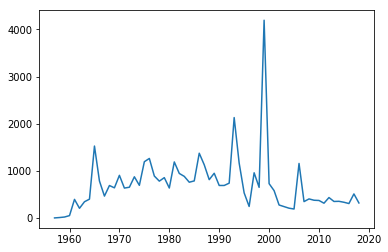

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

from geog0111.nsat import nsat
import numpy as np
'''
This dataset gives the number of 
satellites launched per month and year

data from https://www.n2yo.com
'''
data,years = nsat().data,nsat().years
year = np.arange(years[0],years[1],dtype=np.int)
# sum the data over all months (axis 0)
sum_per_year = data.sum(axis=0)

print(f'data shape {data.shape}')

# plot x as year
# plot y as the number of satellites per year
plt.plot(year,sum_per_year,label='launches per year')

Whilst this plot is fine, there are a few simple things we could do improve it. 

We will go through some of the options below, but to get a taste of improved ploitting, lets use e.g.:

* reset the image shape/size
    * `plt.figure(figsize=(13,3))`
* plot the mean value (as a red dashed line) for comparison
    * `plt.plot([year[0],year[-1]],[mean,mean],'r--',label='mean')`
* limit the dataset to range of variable `year`
    * `plt.xlim(year[0],year[-1])`
* put labels on the x and y axes
    * `plt.xlabel('year')`
    * `plt.ylabel('# satellite launches')`
* set a title
    * `plt.title('data from https://www.n2yo.com')`
* use a legend (in conjunction with `label=` using `plot`)
    * `plt.legend(loc='best')`
* use a log scale in the y-axis
    * `plt.semilogy()`
    
What you choose to do will depend on what you want to show on the graph, but the examples above are quite common.

[]

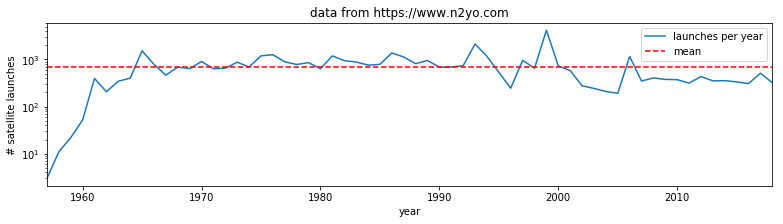

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
from geog0111.nsat import nsat
import numpy as np
'''data as above'''
data,years = nsat().data,nsat().years
year = np.arange(years[0],years[1],dtype=np.int)
sum_per_year = data.sum(axis=0)

# calculate mean of sum_per_year
mean = sum_per_year.mean()

plt.figure(figsize=(13,3))
plt.plot(year,sum_per_year,label='launches per year')
plt.plot([year[0],year[-1]],[mean,mean],'r--',label='mean')
plt.xlim(year[0],year[-1])
plt.xlabel('year')
plt.ylabel('# satellite launches')
plt.title('data from https://www.n2yo.com')
plt.legend(loc='best')
plt.semilogy()

**Exercise E2.3.1**

* produce a plot showing launches per year as a function of year, showing data for selected months individually.

Hint: do a simple plot first, then add some improvements gradually. You might set up a list of months to process and use a loop to go over each month.

[]

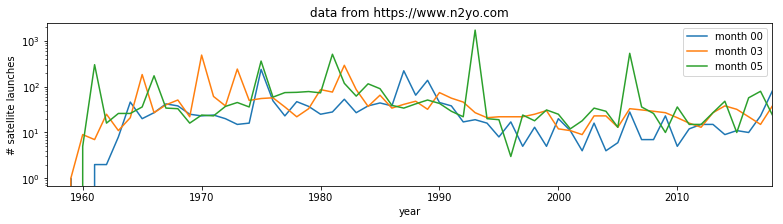

In [63]:
# do exercise here
# ANSWER

import matplotlib.pyplot as plt
%matplotlib inline
from geog0111.nsat import nsat
import numpy as np
'''data as above'''
data,years = nsat().data,nsat().years
year = np.arange(years[0],years[1],dtype=np.int)

# data contains the info we want
#sum_per_year = data.sum(axis=0)

plt.figure(figsize=(13,3))
# loop over the months we want
for month in [0,3,5]:
    plt.plot(year,data[month],label=f'month {month:02d}')
    
# better still would be to use month names
# as in example above

plt.xlim(year[0],year[-1])
plt.xlabel('year')
plt.ylabel('# satellite launches')
plt.title('data from https://www.n2yo.com')
plt.legend(loc='best')
plt.semilogy()

**Exercise 2.3.2**

Putting together some ideas from above to look at some turning points in a function:

* generate a numpy array called `x` with 100 equally spaced numbers between 0 and 5
* generate a numpy array called `y` which contains $x^3 - 9 x^2 + 26 x - 24$
* plot `y` as a function of `x` with a red line
* plot **only positive** values of `y` (as a function of `x`) with a green line

Hint: to plot with red and green line `plot(x,y,'r')` and `plot(x,y,'g')` 

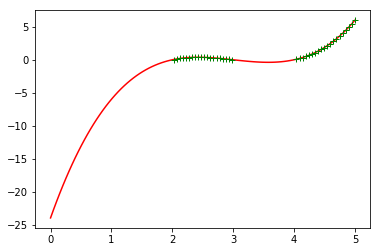

In [67]:
# do exercise here
# ANSWER

x = np.linspace(0,5,100)
y = x**3 - 9 * x**2 + 26 * x - 24
# mask for +ve y
w = y > 0

'''
Its quite difficult to get the green line right
as it has a gap in the middle
so may be better to plot with symbols eg +
'''
plt.plot(x,y,'r-')
plt.plot(x[w],y[w],'g+')

## 2.4  Indexing and slicing arrays

### 2.4.1 Recap

Selecting different elements of the array to operate in them is a very common task. `numpy` has a very rich syntax for selecting different bits of the array. We have come across slicing before, but it is so important to array processing, we will go over some of it again. 

Similar to lists, you can refer to elements in the array by their position. You can also use the `:` symbol to specify a range (a **slice**) of positions `first_element:(last_element+1`. If you want to start counting from the end of the array, use negative numbers: `-1` refers to the last element of the array, `-2` the one before last and so on. In a slice, you can also specify a step as the third element in `first_element:(last_element+1:step`. If the step is negative you count from the back.

All this probably appears mind bogging, but it's easier shown in practice. You'll get used to it quite quickly once you start using it

In [68]:
import numpy as np

a = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(a[2])      # 2
print(a[2:5])    # [2, 3, 4]
print(a[-1])     # 10
print(a[:8])     # [0, 1, 2, 3, 4, 5, 6, 7]
print(a[2:])     # [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(a[5:2:-1]) # [5, 4, 3]


2
[2 3 4]
10
[0 1 2 3 4 5 6 7]
[ 2  3  4  5  6  7  8  9 10]
[5 4 3]


The concept extends cleanly to multidimensional arrays...

In [69]:
b = np.array([[0, 1, 2, 3], [10, 11, 12, 13], [20, 21, 22, 23], [30, 31, 32, 33],
     [40, 41, 42, 43]])

print(b[2, 3])    # 23
print(b[0:5, 1])  # each row in the second column of b 
print(b[:, 1])    # same thing as above 
print(b[1:3, :])  # each column in the second and third row of b

23
[ 1 11 21 31 41]
[ 1 11 21 31 41]
[[10 11 12 13]
 [20 21 22 23]]


**Exercise 2.4.1**

* generate a 2-D numpy array of integer zeros called `x`, of shape (7,7)
* we can think of this as a square. Set the central 3 by 3 samples of the square to one
* print the result

Hint: Don't use looping, instead work out how to define the slice of the central 3 x 3 samples. 

In [73]:
# do exercise here
# ANSWER

x = np.zeros((7,7)).astype(int)
r0,c0 = x.shape
cx,cy = int(r0/2),int(c0/2)

x[cx-1:cx+2,cy-1:cy+2] =1

print(x)

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


### 2.4.1 data mask


A useful way to select elements is by using what's called a mask as we saw above: an array of logical (boolean) elements that only selects the elements that are `True`:

In [74]:
a = np.arange(10)
select_me = a >= 7
print(a[select_me])

[7 8 9]


The previous point also shows something interesting: you can apply comparisons element by element. So in the previous example, `select_me` is a 10 element array where all the elements of `a` that are equal or higher than 7 are set to True.

If you want to build up element by element logical operations, it's best to use specialised functions like [`np.logical_and`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logical_and.html) and friends

In [75]:
a = np.arange(100)
sel1 = a > 45
sel2 = a < 73
print(a[np.logical_and(sel1, sel2)])

[46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69
 70 71 72]


**Exercise 2.4.2**

* generate a numpy array called `x` with 100 equally spaced numbers between 0 and 5
* generate a numpy array called `y` which contains $x^3 - 9 x^2 + 26 x - 24$
* print the values of `x` for which `y` is greater than or equal to zero and `x` lies between 3.5 and 4.5

In [79]:
# do exercise here
# ANSWER

x = np.linspace(0,5,100)
y = x**3 - 9*x**2 + 26*x - 24

# conditions
w1 = np.logical_and(x>3.5,x<=4.5)
w2 = np.logical_and(y >= 0,w1)
print(x[w2])

[4.04040404 4.09090909 4.14141414 4.19191919 4.24242424 4.29292929
 4.34343434 4.39393939 4.44444444 4.49494949]


## 2.5  Reading data

### 2.5.1 `np.loadtxt`

It's a bit tedious just making up numbers to play with them, but it's easy to load up data from external files. The most common data interchange format is [CSV (comma-seperated values)](https://en.wikipedia.org/wiki/Comma-separated_values), a plain text format. Think of CSV as a plain text table. Each element in each row is separated by a comma (although other symbols, such as white space, semicolons `;`, tabs `\t` or pipe `|` symbols are often found as delimiters). The first few lines might contain some metadata that describes the dataset, and the first line will also contain the names of the headers of the different columns.  Lines starting with `#` tend to be ignored. An example file might look like this
```
# Monthly transatlantic airtravel, in thousands of passengers, for 1958-1960. 
# There are 4 fields, "Month", "1958", "1959" and "1960" and 12 records, "JAN" through "DEC". 
# There is also an initial header line.
# And some lines with comments starting with #
# Data obtained from https://people.sc.fsu.edu/~jburkardt/data/csv/csv.html
"Month", "1958", "1959", "1960"
"JAN",  340,  360,  417
"FEB",  318,  342,  391
"MAR",  362,  406,  419
"APR",  348,  396,  461
"MAY",  363,  420,  472
"JUN",  435,  472,  535
"JUL",  491,  548,  622
"AUG",  505,  559,  606
"SEP",  404,  463,  508
"OCT",  359,  407,  461
"NOV",  310,  362,  390
"DEC",  337,  405,  432
```

We can see the first few lines are comments or metadata, the first line without a `#` is the headers, and we note that text is entered between `"`s. In this case, the delimiter is a comma. We can read the data as an array with [`np.loadtxt`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html), telling it...

* to ignore lines starting by #
* to ignore the first column as it's text
* to note that the separator is a comma

In [80]:
air_travel = np.loadtxt("data/airtravel.csv", comments="#", skiprows=6, \
                        usecols=[1,2,3], delimiter=",")
print(air_travel)
print(air_travel.shape)

[[340. 360. 417.]
 [318. 342. 391.]
 [362. 406. 419.]
 [348. 396. 461.]
 [363. 420. 472.]
 [435. 472. 535.]
 [491. 548. 622.]
 [505. 559. 606.]
 [404. 463. 508.]
 [359. 407. 461.]
 [310. 362. 390.]
 [337. 405. 432.]]
(12, 3)


While `np.loadtxt` is quite flexible for dealing with text files, [`pandas`](https://pandas.pydata.org) absolutely shines at working with tabular data. You can find a [pandas quickstart tutorial here](https://pandas.pydata.org/pandas-docs/stable/10min.html) if you are curious about it!

Before we go into plotting, we can do some fun calculations (yay!) using our airtravel data

**Exercise 2.5.1**

* Calculate the total number of passengers per year
* Calculate the average number of passengers per month
* Can you spot any trends in the data?

Hint: Remember the `.sum()`, `.mean()` methods for arrays? 

total passengers per year: [4572. 5140. 5714.]
mean passengers per month: [372.33333333 350.33333333 395.66666667 401.66666667 418.33333333
 480.66666667 553.66666667 556.66666667 458.33333333 409.
 354.         391.33333333]


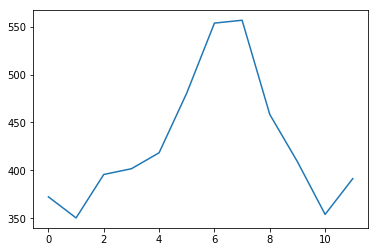

In [85]:
# Space for your solution
# ANSWER

# shape is (12,3) so, month, year

'''
for examining data, do a plot:

we see a clear summer month peak!!

'''
print(f'total passengers per year: {air_travel.sum(axis=0)}')
print(f'mean passengers per month: {air_travel.mean(axis=1)}')

plt.plot(air_travel.mean(axis=1))

Let's plot our previous air travel dataset... We'll plot it as annual lines, so the x axis will be month number (running from 1 to 12) and the y axis will be 1000s of passengers. Different line colours will be used for every year. We'll also add x and y axes labels, as well as a legend:



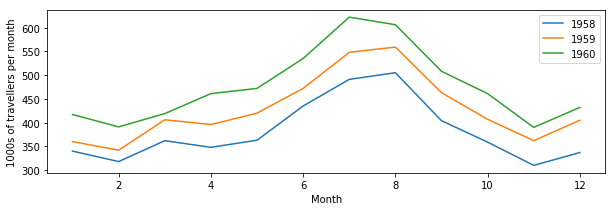

In [86]:
# You can probably just put this at the top of every notebook you write
# Adding it here for completeness
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


# Load airtravel data
air_travel = np.loadtxt("data/airtravel.csv", skiprows=6, \
                        unpack=True, usecols=[1,2,3], delimiter=",")

mths = np.arange(1, 13)
plt.figure(figsize=(10,3))
plt.plot(mths, air_travel[0], '-', label="1958")
plt.plot(mths, air_travel[1], '-', label="1959")
plt.plot(mths, air_travel[2], '-', label="1960")
plt.xlabel("Month")
plt.ylabel("1000s of travellers per month")
plt.legend(loc="best")

You may not want to use lines to join the data points, but symbols like dots, crosses, etc. 

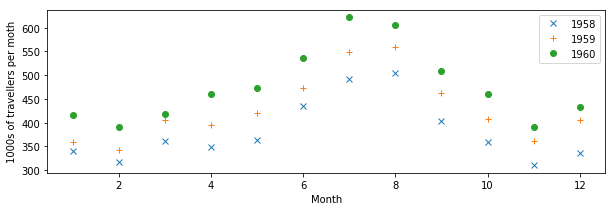

In [87]:
plt.figure(figsize=(10,3))
plt.plot(mths, air_travel[0], 'x', label="1958")
plt.plot(mths, air_travel[1], '+', label="1959")
plt.plot(mths, air_travel[2], 'o', label="1960")
plt.xlabel("Month")
plt.ylabel("1000s of travellers per moth")
plt.legend(loc="best")

We can also use dots **and** lines. Moreover, we can change the type of line: from full lines to dashed to dash-dot...

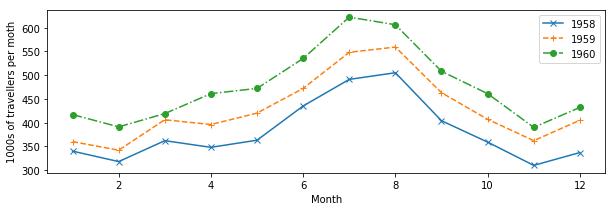

In [88]:
plt.figure(figsize=(10,3))
plt.plot(mths, air_travel[0], 'x-', label="1958")
plt.plot(mths, air_travel[1], '+--', label="1959")
plt.plot(mths, air_travel[2], 'o-.', label="1960")
plt.xlabel("Month")
plt.ylabel("1000s of travellers per moth")
plt.legend(loc="best")

**Exercise 2.5.2**

The file [`NOAA.csv`](data/NOAA.csv) contains data from [NOAA](http://www.aoml.noaa.gov/hrd/tcfaq/E11.html) on the number of storms and hurricanes in the Atlantic basin from 1851 to 2015. The data columns are described in the first row of the file. The year is in column 1 and the number of hurricanes in column 3.

For those interested, the data is pulled from the website with [getNOAA.py](geog0111/getNOAA.py).

* load the year and hurricane data from the file [`NOAA.csv`](data/NOAA.csv) into a numpy array
* produce a plot showing the number of hurricanes as a function of year, with the data plotted in a blue line
* put a dashed red line on the graph showing the mean number of hurricanes
* plot circle symbols for all years where the number of hurricanes is greater than the mean + 1.96 standard deviations.

Hint: the options on `np.loadtxt` you probably want to use are: `skiprows`, `delimiter`, `usecol` and `unpack`. You will need to select the data that meet the required conditions, combining the conditions with `np.logical_and()`.

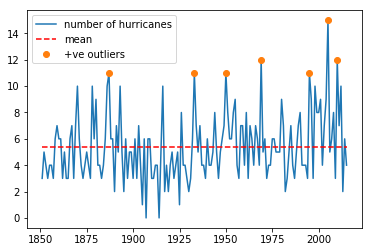

In [97]:
# do exercise here

datafile = 'data/NOAA.csv'
data = np.loadtxt(datafile,skiprows=1,delimiter=',',\
                  usecols = (1,3),unpack=True)

mean = data[1].mean()
std  = data[1].std()

w = data[1] > mean + 1.96 * std

plt.plot(data[0],data[1],label='number of hurricanes')
plt.plot([data[0][0],data[0][-1]],[mean,mean],'r--',label='mean')
plt.plot(data[0][w],data[1][w],'o',label='+ve outliers')
plt.legend(loc='best')

### 2.5.2 `requests`

We can use `np.loadtxt` or similar functions to load tabular data that we have stored locally in e.g. csv format.

Sometimes we will need pull a data file from a [URL](https://en.wikipedia.org/wiki/URL). We have used this idea previously to 'scrape' data from a web page, but often the task is more straightforward, and we effectively need only to 'download' the data in the file.

We will use the `requests` package to do this and pull the data as a string. We then use `StringIO` to allow `np.loadtxt` to think the string comes from a data file.

In [98]:
import requests
from io import StringIO

# Define the URL with the parameters of interest
url = "https://daymet.ornl.gov/single-pixel/api/" + \
        "data?lat=45.4&lon=-115.0534&vars=tmax&start=2000-01-01&end=2009-12-31"

data = requests.get(url).text

# You can check the text file to see its contents, but we now
# (i) it's separated by commas
# (ii) the first 8 lines are metadata that we're not interested in.
temperature = np.loadtxt(StringIO(data), skiprows=8, delimiter=",", unpack=True)

# We expect to get 10 years of data here, so 3650 daily records
# the data are given for 365 days per year ...
print(temperature.shape)

(3, 3650)


If we want to store the data file, we can do so by opening a file:

In [99]:
# We open the output file, `daymet.csv`
with open("data/daymet_tmax.csv", 'w') as fp:
    # make the HTTPS connection and pull text
    # then write to file
    r = fp.write(data)

# You can check the text file to see its contents, but we now
# (i) it's separated by commas
# (ii) the first 9 lines are metadata that we're not interested in.
temperature = np.loadtxt("data/daymet_tmax.csv", skiprows=8, delimiter=",", unpack=True)

# We expect to get ~10 years of data here, so 3650 daily records
print(temperature.shape)

(3, 3650)


The data columns are: `Year`, `day of year` (1 to 365) and `Tmax` ($C$).

How can we plot such data? the technical issue we face is needing to use the first *two* columns of data (day of year and year) to describe the x-axis location. 

In [100]:
print('Year ',temperature[0])
print('DOY  ',temperature[1])
print('T_max',temperature[2])

Year  [2000. 2000. 2000. ... 2009. 2009. 2009.]
DOY   [  1.   2.   3. ... 363. 364. 365.]
T_max [-1.5 -2.5 -1.5 ... -1.5 -3.  -2. ]




A simple way of doing this, that would suffice here, would be to convert day of year to year fraction, then we could write:

    year,doy,tmax = temperature
    dates = year + (doy-1)/365.
    
A more elegant way might be to use [`datetime`](https://docs.python.org/3/library/datetime.html). This contains a set of methods that allow you to manipulate date formats. `matplotlib` understands the format used, and so it is generally appropriate to use `datetime` for date information when plotting.

    year,doy,tmax = temperature
    dates = [datetime.datetime(int(y), 1, 1) + \
         datetime.timedelta(d - 1) for y,d in zip(year,doy)]

Text(0.5, 0, 'year')

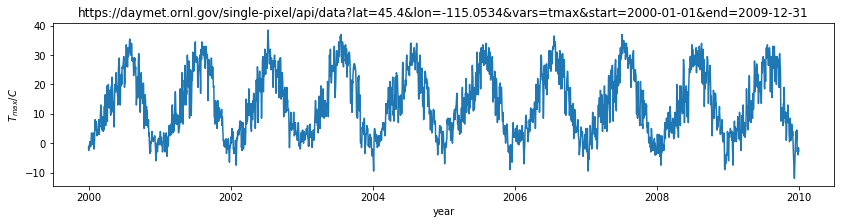

In [101]:
import datetime

year,doy,tmax = temperature
dates = year + (doy-1)/365.
# using the simple way here

plt.figure(figsize=(14,3))
plt.plot(dates,tmax)
plt.title(url)
plt.ylabel('$T_{max} / C$')
plt.xlabel('year')

**Exercise E2.5.3**

* use the datetime approach to plot the dataset
* print out the value of `dates` for the first 10 entries to see what the format looks like

Text(0.5, 0, 'year')

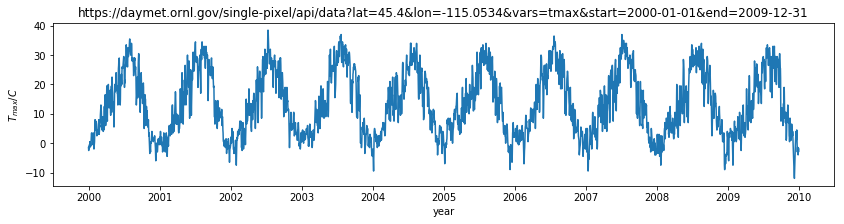

In [103]:
# do exercise here
# ANSWER

import datetime

year,doy,tmax = temperature

# see above!
dates = [datetime.datetime(int(y), 1, 1) + \
     datetime.timedelta(d - 1) for y,d in zip(year,doy)]

# using the simple way here

plt.figure(figsize=(14,3))
plt.plot(dates,tmax)
plt.title(url)
plt.ylabel('$T_{max} / C$')
plt.xlabel('year')

Although we have used this as a one-dimensional dataset (temperature as a function of time) we could also think of it as two-dimensional (temperature as a function of (year,doy)). Recall that the `shape` of the `temperature` dataset was `(3,3650)`. We could put the temperature column into a gridded dataset of shape `(10,365)` which would then emphasise the 2-D nature.

We can do this with the `numpy` method `reshape()`. 

(1, 366)

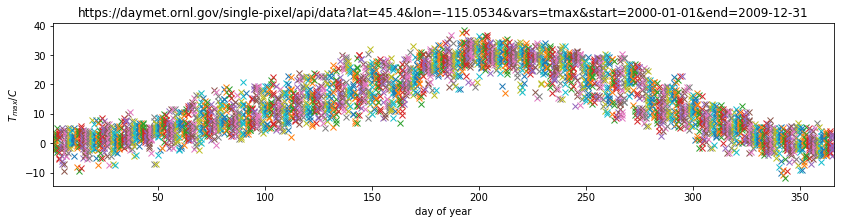

In [104]:
year = temperature[0].reshape(10,365)
doy  = temperature[1].reshape(10,365)
tmax = temperature[2].reshape(10,365)

plt.figure(figsize=(14,3))
plt.plot(doy,tmax,'x')
plt.title(url)
plt.ylabel('$T_{max} / C$')
plt.xlabel('day of year')
plt.xlim([1,366])

Plotting this, we can visualise the year-on-year variations in temperature for any particular day.

**Exercise E2.5.3**

* using the reshaped datasets above, calculate and plot the mean value of `tmax` as a function of day of year
* calculate standard deviation of `tmax` as a function of day of year, and plot dashed lines at mean +/- 1.96 standard deviations
* in another plot, show the mean, +/- 1.96 standard deviations of `tmax` as a function of year (i.e. the annual average and standard deviation)

Hint: use `axis=0` when calculating the mean/std over `doy` of `tmax` and `axis=1` for processing over `year`.

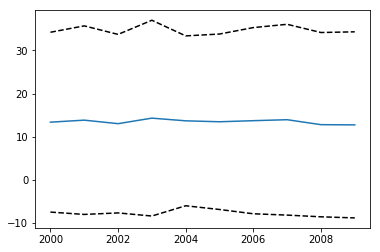

In [110]:
# do exercise here
# ANSWER

meanval = tmax.mean(axis=1)
stdval = tmax.std(axis=1)

plt.plot(year[:,0],meanval)
plt.plot(year[:,0],meanval+1.96*stdval,'k--')
plt.plot(year[:,0],meanval-1.96*stdval,'k--')

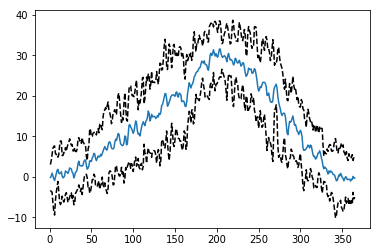

In [112]:
# do exercise here
# ANSWER

meanval = tmax.mean(axis=0)
stdval = tmax.std(axis=0)

plt.plot(doy[0],meanval)
plt.plot(doy[0],meanval+1.96*stdval,'k--')
plt.plot(doy[0],meanval-1.96*stdval,'k--')

### 2.5.4 Homework

#### Exercise E2.5.4

Select 4 locations in different regions of North America (e.g. Anchorage, Albuquerque, Seattle, Chicago). Request data on maximum temperature, precipitation and incident solar radiation for the years between 1981 to 2010, and plot in 3 different figures:

* Figure 1: The *mean daily temperature* and the variation (a shaded area around the mean going from mean value **minus** 1.96 times the standard deviation to mean value **plus** 1.96 times the standard deviation). Use a subplot or panel for each site
* Figure 2: The *mean daily precipitation* and the variation (a shaded area around the mean going from mean value **minus** 1.96 times the standard deviation to mean value **plus** 1.96 times the standard deviation). Use a subplot or panel for each site
* Figure 3: The *mean daily incident solar radiation* and the variation (a shaded area around the mean going from mean value **minus** 1.96 times the standard deviation to mean value **plus** 1.96 times the standard deviation). Use a subplot or panel for each site

In each plot, the mean value should be a full line, and the variation should be an envelope, visually similar to the plot shown below (clearly not identical!!!!)

![la niña plot](https://www.metoffice.gov.uk/binaries/content/gallery/mohippo/images/news/charts-and-images/compare_datasets_new_logo_1850-1900-20122017a-630.jpg)


Label each plot with a title, units and so on. Some useful functions to consider

* [`plt.subplots`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html) Allows you to split a figure into several panels or subplots. In particular, pay attention to the `sharex` and `sharey` options that allow you to have the same scales for all plots so they can be directly compared.
* [`plt.fill_between`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html) Allows you to fill the space between two curves. You may want to give the option `color=0.8` for a nice grey effect.

Anchorage 0 410793
Albuquerque 1 411666
Seattle 2 410847
Chicago 3 411264


'\nNeed to complete this!\n\nLewis\n'

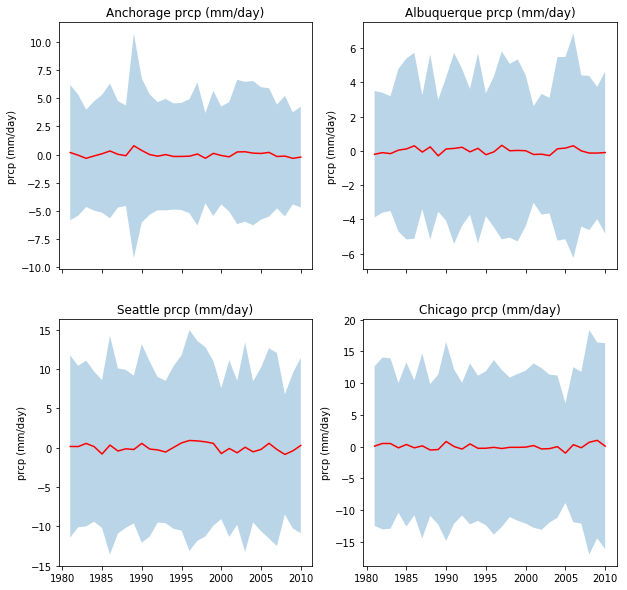

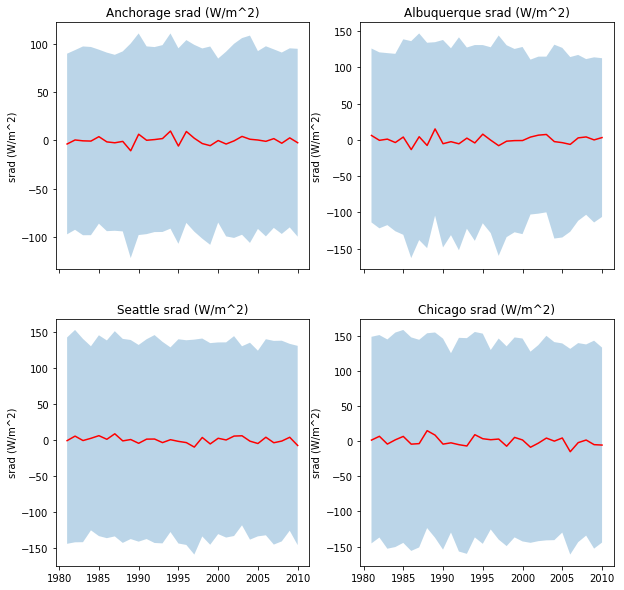

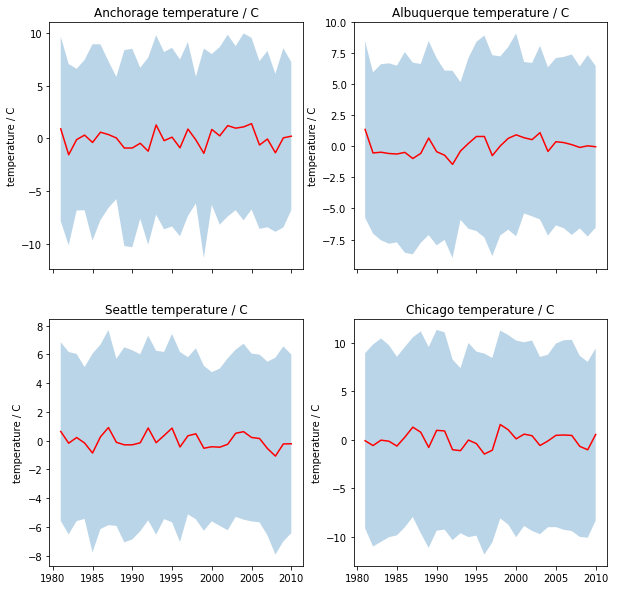

In [41]:
# do exercise here
# ANSWER
import requests
import matplotlib.pylab as plt
import numpy as np
from io import StringIO
%matplotlib inline

locs = ['Anchorage', 'Albuquerque', 'Seattle', 'Chicago']
lats = [61.2181,      35.0844,       47.6062,   41.8781]
lons = [-149.9003,    -106.6504,     -122.3321, -87.6298]

axs = []
figs = []
for i in range(3):
    fig, axs1 = plt.subplots(nrows=2, ncols=2, \
                        sharex=True, sharey=False,\
                        figsize=(10, 10))
    axs.append(axs1)
    figs.append(fig)
    
axs = np.array(axs).flatten()
figs = np.array(figs).flatten()

txt = ['prcp (mm/day)', 'srad (W/m^2)', 'temperature / C']

for i,l in enumerate(locs):
    
    url = "https://daymet.ornl.gov/single-pixel/api/" + \
        f"data?lat={lats[i]}&lon={lons[i]}&vars=tmax,prcp,srad&start=1981-01-01&end=2010-12-31"
    data = requests.get(url).text
    
    # little data size check !!!
    print (l,i,len(data))
    
    temperature = np.loadtxt(StringIO(data), skiprows=8, delimiter=",", unpack=True)

    nyears = int(temperature.shape[1]/365)
    year = temperature[0].reshape(nyears,365)
    doy  = temperature[1].reshape(nyears,365)


    years = (year[:,0]).astype(int)

    for j in range(3):
        vari = temperature[2+j].reshape(nyears,365)
        mean_year = vari.mean(axis=0)
        # detrended mean .... depends what you want to show
        mean = (vari - mean_year).mean(axis=1)
        var = ((vari - mean_year)**2).mean(axis=1)
        std = np.sqrt(var)
        axs[j*4+i].set_title(l+' ' + txt[j])
        axs[j*4+i].fill_between(years,mean-std*1.96,mean+std*1.96,alpha=0.3)
        axs[j*4+i].plot(years,mean,'r')
        axs[j*4+i].set_ylabel(txt[j])

'''
Need to complete this!

Lewis
'''

### 2.5.5 Summary

In this section, we have learned about reading data from csv files from the local disc or that we have pulled from the web (given a URL). We have gone into a little more detail and sophistication on plotting graphs, and you now should be able to produce sensible plots of datasets or summaries of datasets (e.g. mean standard deviation).